# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

# Understanding Data 

### Understand size and contents of the dataset

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing value treatment

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Age int var : can use mean or median 
A = df["Age"].mean()
df["Age"].fillna(A,inplace=True)

In [8]:
mode_value = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_value, inplace=True)

In [9]:
mode_value = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_value, inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 1. How many passengers survived and how many did not survive?

<AxesSubplot:xlabel='Survived', ylabel='count'>

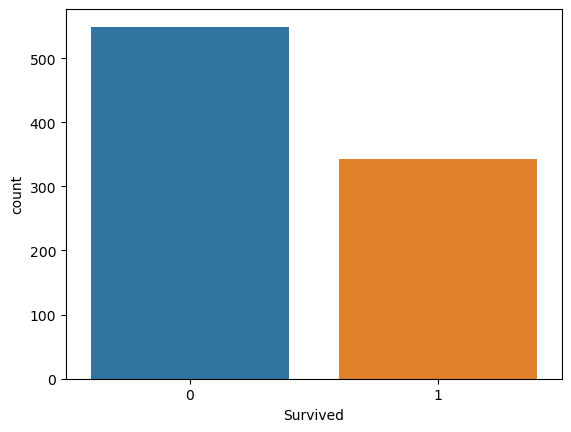

In [11]:
sns.countplot(x='Survived',data=df)

### 2. What is the %age distribution of male and female

In [13]:
# Convert categorical column to numeric values and give it as input to piechart
a = df['Sex'].value_counts()
a

male      577
female    314
Name: Sex, dtype: int64

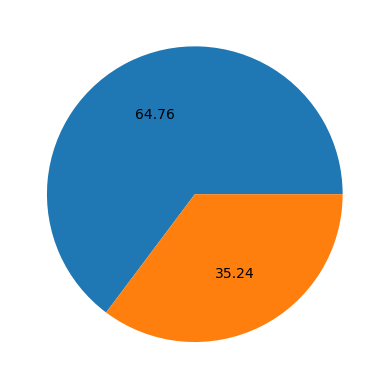

In [14]:
plt.pie(x=a,autopct='%.2f')
plt.show()

### 3. What is the  avg age of passengers Pclass wise

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Find Pclass wise avg age
avg_age = df.groupby('Pclass')['Age'].mean()
print(avg_age)

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64


In [17]:
values = df["Pclass"].sort_values().unique()
#values = sorted(values)
print(values)

[1 2 3]


<AxesSubplot:ylabel='Age'>

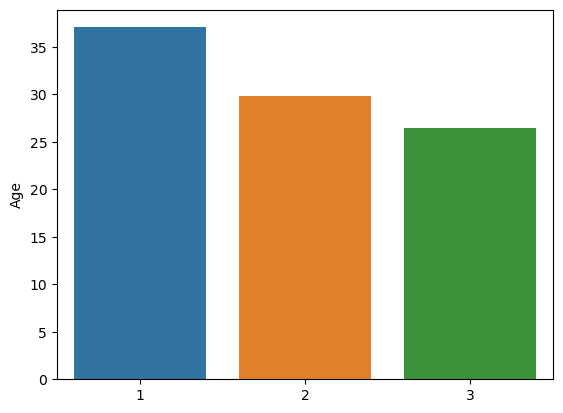

In [18]:
# Pclass wise avg age: barplot
sns.barplot(x = values, y = avg_age)

### 4. Calculate the average fare paid by passengers in each class (Pclass)

In [19]:
avg_age = df.groupby('Pclass')['Fare'].mean()
print(avg_age)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


### 5. Find the number of male and female passengers and visualize it using a Pie chart.

In [20]:
gender_counts = df['Sex'].value_counts()
mylabels = df["Sex"].unique()
print(gender_counts)
print(mylabels)

male      577
female    314
Name: Sex, dtype: int64
['male' 'female']


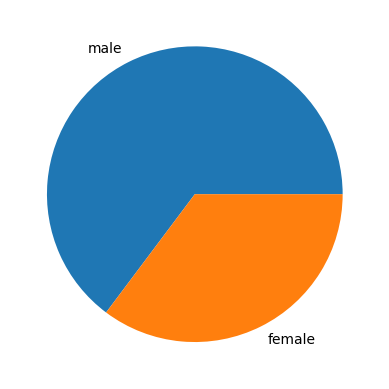

In [21]:
plt.pie(gender_counts,labels=mylabels)
plt.show()

### 6. Identify the top 5 youngest passengers and display their names, ages, and class.

In [22]:
#, ascending=False
top_youngest = df[['Name', 'Age', 'Pclass']].sort_values(by='Age')

print("Top 5 youngest Passengers:")
print(top_youngest.head(5))

print("\n Top 5 oldest Passengers:")
print(top_youngest.tail(5))

Top 5 youngest Passengers:
                                Name   Age  Pclass
803  Thomas, Master. Assad Alexander  0.42       3
755        Hamalainen, Master. Viljo  0.67       2
644           Baclini, Miss. Eugenie  0.75       3
469    Baclini, Miss. Helene Barbara  0.75       3
831  Richards, Master. George Sibley  0.83       2

 Top 5 oldest Passengers:
                                     Name   Age  Pclass
116                  Connors, Mr. Patrick  70.5       3
96              Goldschmidt, Mr. George B  71.0       1
493               Artagaveytia, Mr. Ramon  71.0       1
851                   Svensson, Mr. Johan  74.0       3
630  Barkworth, Mr. Algernon Henry Wilson  80.0       1


### 7. How many passengers servived Pclass wise 

### crosstab  (Categorical-Categorical)

In [23]:
# Pclass-wise survival
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass', ylabel='count'>

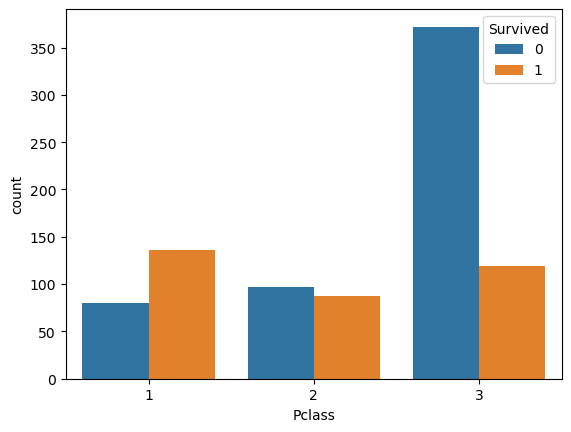

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [25]:
# Adding Total count
pd.crosstab(df['Pclass'], df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891
